<a href="https://colab.research.google.com/github/audibagja/eaaabagja/blob/master/GPV_reserve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Tabel Mortalitas

Dalam perhitungan GPV pada python, langkah pertama yang harus dilakukan adalah mengimport data tabel mortalitas ke dalam python. Kemudian definisikan peluang laki-laki meninggal sebagai variabel 'pm', sedangkan peluang perempuan meninggal sebagai variabel 'pf'.

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Tabel Mortalita IV.csv to Tabel Mortalita IV (1).csv


In [ ]:
#IMPORT DATA
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['Tabel Mortalita IV.csv']))
pm=data['Laki-Laki']
pf=data['Perempuan']

,Usia,Laki-Laki,Perempuan
0,0,0.00524,0.00266
1,1,0.00053,0.00041
2,2,0.00042,0.00031
3,3,0.00034,0.00024
4,4,0.00029,0.00021
...,...,...,...
107,107,0.49429,0.46604
108,108,0.52467,0.50427
109,109,0.55733,0.54477
110,110,0.59244,0.58702


## 2. Membuat Fungsi Untuk Menghitung GPV Reserve

Setelah data diimport, langkah selanjutnya adalah membuat fungsi untuk menghitung GPV reserve. Dalam fungsi ini, terdapat fungsi-fungsi lain yang membantu perhitungan GPV, seperti fungsi peluang hidup seseorang, fungsi asuransi berjangka diskrit, fungsi asuransi dwiguna diskrit, dan fungsi premi kotor.

In [ ]:
#MENCARI GPV RESERVE DENGAN MODIF BENEFIT
def gpv():
    #import package
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    #input data
    sum_assured=int(input('Uang Pertanggungan=')) #Uang pertanggungan
    s=int(input('Gender? (Laki-Laki=0, Perempuan=1)')) #Gender pemegang polis
    i=float(input('Masukkan nilai discount rate=')) #nilai disc rate
    inflation=float(input('Masukkan nilai inflation rate=')) #nilai inflation rate
    x=int(input('Umur saat membeli polis=')) #Age of entry pemegang polis
    t=15 #Asuransi berjangka 15 tahun
    pie=float(0.2) #initial expense of premium
    ie=int(8000000) #initial expense konstan
    pre=float(0.06) #renewal expense of premium
    re=int(2000000) #renewal expense konstan
    mb=sum_assured #Maturity benefit, 100% dari uang pertangungan
    tahun=int(input('Tahun pembelian polis=')) #Tahun pembelian polis

    def vt(i,t): #present value
        return (1+i)**-t
    
    def pel(s,x,t): #tpx
        if s==0: #peluang jika pemegang polis laki-laki
            if t==0:
                px=1
            else:
                px=1
                for y in np.arange(x,x+t):
                    px=px*(1-pm[y])
        else: #peluang jika pemegang polis perempuan
            if t==0:
                px=1
            else:
                px=1
                for y in np.arange(x,x+t):
                    px=px*(1-pf[y])
        return px
    
    def q(s,x,t): #tqx
        return 1-pel(s,x,t)
    
    def PK(): #Fungsi premi kotor
        def a(s,i,x,t): #fungsi anuitas berjangka diskrit
            ax=0
            for y in np.arange(0,t):
                ax=ax+(vt(i,y)*pel(s,x,y))
            return ax
        def AB(s,i,x,t): #fungsi asuransi berjangka diskrit
            Ab=0
            for y in np.arange(0,t):
                Ab=Ab+(vt(i,y+1)*pel(s,x,y)*q(s,x+y,1))
            return Ab
        def AD(s,i,x,t): #fungsi asuransi dwiguna diskrit
            Ad = pel(s,x,t)*vt(i,t)
            return Ad

        A=[]
        for y in np.arange(1,t+1): 
            if y==5:
                b1=sum_assured
            elif y==10:
                b2=1.2*sum_assured
            elif y==15:
                b3=1.4*sum_assured
            else:
                continue
            As=(AB(s,i,x,y))
            A.append(As)
        benefit=(b1*A[0])+(b2*(A[1]-A[0]))+(b3*(A[2]-A[1]))
        pk=int((benefit+(mb*AD(s,i,x,t))+(2000000*a(s,i,x,t))+6000000)/((0.94*a(s,i,x,t))-0.14))
        return pk
    
    #BANYAK POLIS
    num_of_police_BOY=[] #list jumlah polis di awal tahun
    num_of_police_EOY=[] #list jumlah polis di akhir tahun
    num_of_lapse=[] #list jumlah polis yang lapse
    num_of_death=[] #list jumlah kematian
    for y in np.arange(0,t):
        n=round(q(s,x+y,1),6)
        num_of_death.append(n) #mencari jumlah kematian dari tahun pertama sampai ke-t
        
    lapse_rate=[] #list lapse rate
    for y in np.arange(1,t+1):
        if y==1:
            n=0.4
        elif y>1 and y<=4:
            n=0.3
        elif y>4 and y<=7:
            n=0.2
        elif y>7 and y<=9:
            n=0.1
        else:
            n=0.05
        lapse_rate.append(n)
    
    
    for y in np.arange(0,t):
        if y==0:
            n=round(pel(s,x,y),6)
        else:
            n=num_of_police_EOY[y-1]
        num_of_police_BOY.append(n) #mencari jumlah polis di awal tahun dari tahun pertama sampai ke-t
        
        o=round((num_of_police_BOY[y]*lapse_rate[y]),6)
        num_of_lapse.append(o) #mencari jumlah polis yang lapse dari tahun pertama sampai ke-t
        
        m=round((num_of_police_BOY[y]-num_of_death[y]-num_of_lapse[y]),6)
        num_of_police_EOY.append(m) #mencari jumlah polis di akhir tahun dari tahun pertama sampai ke-t
    
    #EXPENSE INFORMATION
    initial_expense=int((pie*PK())+ie) #expense di tahun pertama
    renewal_expense=[] # list expense di tahun-tahun selanjutnya
    for y in np.arange(0,t):
        if y==0:
            n=0
        else:
            n=int((pre*PK())+(re*((1+inflation)**(y))))
        renewal_expense.append(n) #mencari expense pada tahun pertama sampai ke-t
    
    
    #BENEFIT YANG AKAN DIDAPATKAN
    death_benefit=[] #list manfaat yang harus dibayarkan apabila tertanggung meninggal dunia dalam masa pertanggungan
    for y in np.arange(1,t+1):
        if y<=5:
            b=sum_assured
        elif y<=10 and y>5:
            b=1.2*sum_assured
        else:
            b=1.4*sum_assured
        death_benefit.append(b) #mencari manfaat yang harus dibayarkan dari tahun pertama sampai tahun ke-t
    
    #KLAIM DAN EXPENSE PER TAHUN YANG HARUS DIBAYAR PERUSAHAAN
    death_claim=[] #list jumlah klaim yang harus dibayarkan apabila tertanggung meninggal dunia dalam masa pertanggungan
    for y in np.arange(0,t):
        n=num_of_death[y]*death_benefit[y]
        death_claim.append(n)     
    
    maturity_claim=mb*num_of_police_EOY[-1] #jumlah klaim yang harus dibayarkan apabila tertanggung tidak meninggal dunia sampai polis berakhir
    
    op_expense_cf=[] #list expense yang harus dibayarkan dari tahun pertama sampai tahun ke-t
    for y in np.arange(0,t):
        if y==0:
            n=int(initial_expense*num_of_police_BOY[y])
        else:
            n=int(renewal_expense[y]*num_of_police_BOY[y])
        op_expense_cf.append(n)
    
    #PEMBAYARAN PREMI PER TAHUN YANG AKAN DIDAPATKAN PERUSAHAAN
    premium_income=[] #list premi yang akan didapatkan oleh perusahaan dari tahun pertama sampai tahun ke-t
    for y in np.arange(0,t):
        n=int(PK()*num_of_police_BOY[y])
        premium_income.append(n)
    
    #EXPECTED PRESENT VALUE FUTURE OUTGO
    list=[13,12,11,10,9,8,7,6,5,4,3,2,1,0]
    
    PV_death_claim=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #list present value dari death claim yang akan terjadi di masa depan
    for y in list:
        n=int((PV_death_claim[y+1]*vt(i,1))+(death_claim[y+1]*(vt(i,0.5))))
        PV_death_claim[y]=n
        
    PV_mb_claim=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #list present value dari maturity claim yang akan terjadi di masa depan
    for y in list:
        if y==13:
            n=int(maturity_claim*vt(i,1))
        else:
            n=int(PV_mb_claim[y+1]*vt(i,1))
        PV_mb_claim[y]=n
        
    PV_expense=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #list present value dari expense yang akan dibayarkan di masa depan
    for y in list:
        if y==13:
            n=int(op_expense_cf[y+1]*(vt(i,0.5)))
        else:
            n=int(PV_expense[y+1]*vt(i,1)+(op_expense_cf[y+1]*vt(i,0.5)))
        PV_expense[y]=n
    
    #TOTAL PV CASH OUTFLOW DAN INFLOW
    PV_outflow=[] #List outflow dari tahun pertama sampai tahun ke-t
    for y in np.arange(0,t):
        n=int(PV_death_claim[y]+PV_mb_claim[y]+PV_expense[y])
        PV_outflow.append(n)
        
    PV_inflow=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #List inflow dari tahun pertama sampai tahun ke-t
    for y in list:
        if y==13:
            n=int(premium_income[y+1])
        else:
            n=int((PV_inflow[y+1]*vt(i,1))+premium_income[y+1])
        PV_inflow[y]=n
    
    #GPV RESERVE
    GPV_reserve=[] #menghitung gpv reserve milik perusahaan dari tahun pertama sampai tahun ke-
    for y in np.arange(0,15):
        n=PV_outflow[y]-PV_inflow[y]
        if n<0:
            n=0
        GPV_reserve.append(n)
    
    #definisikan ulang variabel agar lebih sederhana
    rexp=renewal_expense
    premi=premium_income
    BOY=num_of_police_BOY
    death=num_of_death
    lapse=num_of_lapse
    EOY=num_of_police_EOY
    db=death_benefit
    dc=death_claim
    exp=op_expense_cf
    pdc=PV_death_claim
    pmc=PV_mb_claim
    pexp=PV_expense
    out=PV_outflow
    inf=PV_inflow
    g=GPV_reserve
    
    #Buat dataframe output
    df = pd.DataFrame({'Year':[tahun,tahun+1,tahun+2,tahun+3,tahun+4,tahun+5,tahun+6,tahun+7,tahun+8,tahun+9,tahun+10,tahun+11,tahun+12,tahun+13,tahun+14,tahun+15],\
                       'Age':[x,x+1,x+2,x+3,x+4,x+5,x+6,x+7,x+8,x+9,x+10,x+11,x+12,x+13,x+14,x+15],\
                       'Premium':[PK(),PK(),PK(),PK(),PK(),PK(),PK(),PK(),PK(),PK(),PK(),PK(),PK(),PK(),PK(),0],\
                       'Initial Expense':[initial_expense,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],\
                       'Renewal Expense':[rexp[0],rexp[1],rexp[2],rexp[3],rexp[4],rexp[5],rexp[6],rexp[7],rexp[8],rexp[9],rexp[10],rexp[11],rexp[12],rexp[13],rexp[14],0],\
                       'Death Benefit':[db[0],db[1],db[2],db[3],db[4],db[5],db[6],db[7],db[8],db[9],db[10],db[11],db[12],db[13],db[14],0],\
                       'Maturity Benefit':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,mb],\
                       'Premium Income': [premi[0],premi[1],premi[2],premi[3],premi[4],premi[5],premi[6],premi[7],premi[8],premi[9],premi[10],premi[11],premi[12],premi[13],premi[14],0],\
                       'Expected Present Value of Death Claim by The EOY':[pdc[0],pdc[1],pdc[2],pdc[3],pdc[4],pdc[5],pdc[6],pdc[7],pdc[8],pdc[9],pdc[10],pdc[11],pdc[12],pdc[13],0,0],\
                       'Expected Present Value of Maturity Claim by The EOY':[pmc[0],pmc[1],pmc[2],pmc[3],pmc[4],pmc[5],pmc[6],pmc[7],pmc[8],pmc[9],pmc[10],pmc[11],pmc[12],pmc[13],0,0],\
                       'Expected Present Value of Operational Expense by The EOY':[pexp[0],pexp[1],pexp[2],pexp[3],pexp[4],pexp[5],pexp[6],pexp[7],pexp[8],pexp[9],pexp[10],pexp[11],pexp[12],pexp[13],0,0],\
                       'Total Present Value Cash-Outflow':[out[0],out[1],out[2],out[3],out[4],out[5],out[6],out[7],out[8],out[9],out[10],out[11],out[12],out[13],0,0],\
                       'Total Present Value Cash-Inflow':[inf[0],inf[1],inf[2],inf[3],inf[4],inf[5],inf[6],inf[7],inf[8],inf[9],inf[10],inf[11],inf[12],inf[13],0,0],\
                       'GPV Reserve':[g[0],g[1],g[2],g[3],g[4],g[5],g[6],g[7],g[8],g[9],g[10],g[11],g[12],g[13],0,0]})
    
    #Membuat grafik output
    gpv=df['GPV Reserve']
    outflow=df['Total Present Value Cash-Outflow']
    inflow=df['Total Present Value Cash-Inflow']
    data_x=np.arange(0,t-1)
    
    fig, ax = plt.subplots(ncols=3, sharey=True,figsize=(16,8))
    ax[0].plot(data_x, outflow[:14], marker='o', color='r')
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Total Present Value Cash-Outflow')
    ax[0].set_title('Cash-Outflow')
    
    ax[1].plot(data_x, inflow[:14], marker='o', color='b')
    ax[1].set_xlabel('Year')
    ax[1].set_ylabel('Total Present Value Cash-Inflow')
    ax[1].set_title('Cash-Inflow')
    
    ax[2].plot(data_x, gpv[:14], marker='o', color='#9934FF')
    ax[2].set_xlabel('Year')
    ax[2].set_ylabel('GPV Reserve')
    ax[2].set_title('GPV Reserve')
    
    grafik=plt.show()
    
    return df
    return grafik

## Memanggil Fungsi GPV Reserve

Setelah fungsi GPV Reserve telah dibuat, kita akan memanggil fungsi tadi yang akan memberikan hasil perhitungan GPV Reserve yang kita butuhkan.

Uang Pertanggungan=300000000
Gender? (Laki-Laki=0, Perempuan=1)0
Masukkan nilai discount rate=0.06
Masukkan nilai inflation rate=0.064
Umur saat membeli polis=20
Tahun pembelian polis=2015


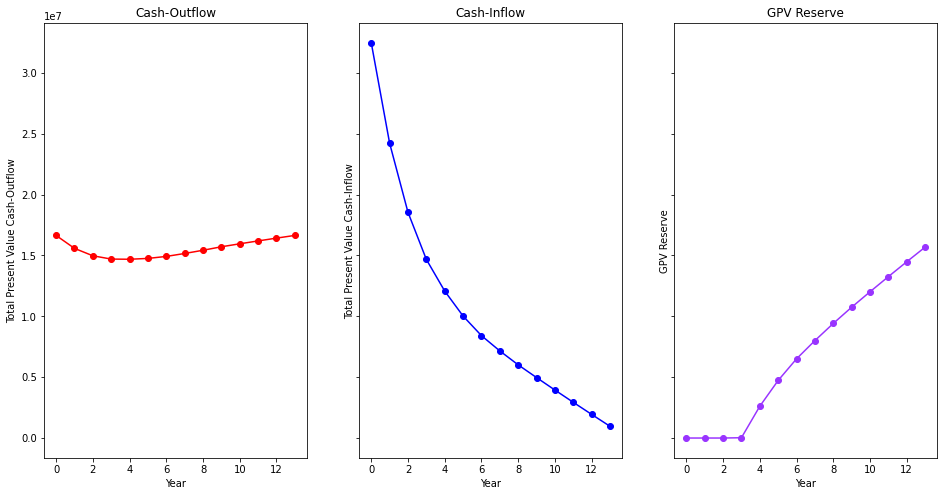

,Year,Age,Premium,Initial Expense,Renewal Expense,Death Benefit,Maturity Benefit,Premium Income,Expected Present Value of Death Claim by The EOY,Expected Present Value of Maturity Claim by The EOY,Expected Present Value of Operational Expense by The EOY,Total Present Value Cash-Outflow,Total Present Value Cash-Inflow,GPV Reserve
0,2015,20,16055168,11211033,0,300000000.0,0,16055168,2197678,7459179,6987666,16644523,32484598,0
1,2016,21,16055168,0,3091310,300000000.0,0,9625233,2178193,7906730,5498867,15583790,24230927,0
2,2017,22,16055168,0,3227502,300000000.0,0,6729796,2157539,8381134,4435943,14974616,18551199,0
3,2018,23,16055168,0,3372410,300000000.0,0,4702992,2135646,8884003,3685027,14704676,14679100,25576
4,2019,24,16055168,0,3526592,300000000.0,0,3284229,2109351,9417044,3163406,14689801,12078564,2611237
5,2020,25,16055168,0,3690642,360000000.0,0,2619352,2043178,9982067,2733294,14758539,10026765,4731774
6,2021,26,16055168,0,3865192,360000000.0,0,2087139,1961916,10580992,2379971,14922879,8416004,6506875
7,2022,27,16055168,0,4050912,360000000.0,0,1660875,1857246,11215852,2091323,15164421,7160437,8003984
8,2023,28,16055168,0,4248519,360000000.0,0,1485151,1727764,11888804,1812185,15428753,6015804,9412949
9,2024,29,16055168,0,4458772,360000000.0,0,1326205,1571981,12602133,1541721,15715835,4970975,10744860


In [ ]:
#PANGGIL FUNGSI GPV
gpv()

In [ ]:
020

In [ ]:
import math

x = int(input('Masukkan umur awal (tahun)=  '))
t = int(input('Masukkan jangka hidup (tahun)= '))
A = float(input('Nilai parameter A Makeham (0<A<1)= '))
B = float(input('Nilai parameter B Makeham (0<A<1)= '))
C = float(input('Nilai parameter C Makeham (0<A<1)= '))

y = B/math.log(C)

Sx = float(math.exp((-A*x)-(y*((C**(x)-1)))
Sxt = float(math.exp((-A*(x+t))-(y*(C**(x+t)-1))))

tPx = Sxt/Sx

print(t, 'P', x, '=', tPx)


SyntaxError: ignored